In [2]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from matplotlib import pyplot
from dotenv import load_dotenv
import os

load_dotenv()

provider = QiskitRuntimeService(token=os.environ["ibm_token"], channel="ibm_quantum")

# Selecting a source of noise
real_backend = provider.backend("ibm_brisbane")
backend = AerSimulator.from_backend(real_backend)

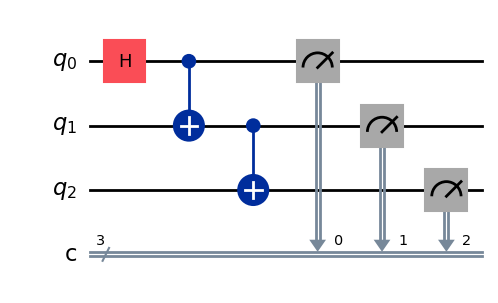

In [3]:
circuit = QuantumCircuit(3, 3)
circuit.name = "My First Quantum Program"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

circuit.draw('mpl')

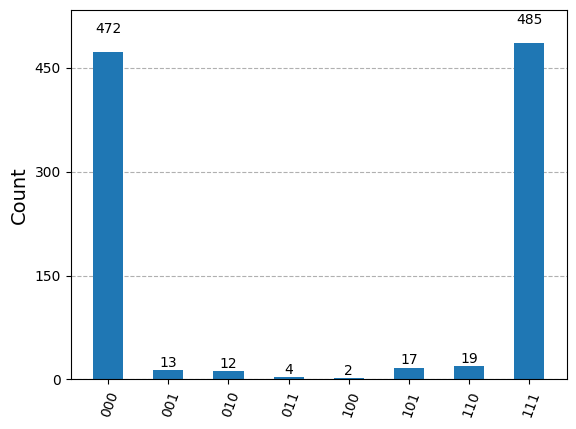

In [4]:
# Transpile circuit to work with the current backend.
qc_compiled = transpile(circuit, backend)

# Run the job
job_sim = backend.run(qc_compiled, shots=1024)

# Get the result
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# Plot the result
plot_histogram(counts)